<img src="res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2018

In [46]:
import numpy as np

<h1>1. Funciones de utilidad</h1>

In [47]:
def linear_activation(W, b, X):
    '''
    Linear activation given and input X, and layer parameters W and b.
    '''
    z = np.dot(W,X) + b
    
    return z

In [48]:
def sigmoid(z):
    '''
    Returns sigmoid activation for array z
    '''
    a = 1. / (1. + np.exp(-z)) 
    
    return a 

In [49]:
def d_sigmoid(z):
    return sigmoid(z) * (1. - sigmoid(z))

In [50]:
def loss(y, a):
    '''
    Logistic loss.
    '''
    return -(y * np.log(a) + (1-y) * np.log(1-a))

In [51]:
def cost(logloss):
    '''
    Cost function as mean of loss for every sample in dataset.
    '''
    return np.mean(logloss)

In [52]:
def print_network(layers):
    '''
    Print network architecture defined by input dictionary 'layers'
    '''

    l = len(layers)
    for i in range(l):
        if(i == 0):
            print('Input layer: ', layers['l'+str(i)])
        elif(i < l-1):
            print('Hidden layer: ',i,' ', layers['l'+str(i)])
        else:
            print('Output layer: ', layers['l'+str(i)])

In [53]:
layers = {'l0':(2, 'sigmoid'), 'l1':(2, 'sigmoid'), 'l2':(3, 'sigmoid'), 'l3':(1, 'sigmoid')} #dictionary with layers parameters
print_network(layers)

('Input layer: ', (2, 'sigmoid'))
('Hidden layer: ', 1, ' ', (2, 'sigmoid'))
('Hidden layer: ', 2, ' ', (3, 'sigmoid'))
('Output layer: ', (1, 'sigmoid'))


<h1>2. Inicialización de parámetros</h1>

Definido como:

<font size=3>
<center>$W^{[i]} \in R^{nl^{[i]} \times nl^{[i-1]}}$</center>
<center>$b^{[i]} \in R^{nl^{[i]} \times 1}$</center>
</font>

In [54]:
def init(layers):
    '''
    Random initialization of parameters W and b for every layer in network specified in dictionary 'layers'.
    
    Input dictionary has the form: 'li':(int:number of neurons, string:activation function).
    activation function can be: 'sigmoid' and 'relu'
    '''
    
    l = len(layers) #number of layers
    
    parameters = {}
    
    for i in range(1, l):
        W = np.random.randn(layers['l'+str(i)][0], layers['l'+str(i-1)][0])
        b = np.zeros([layers['l'+str(i)][0], 1])
        
        parameters['l'+str(i)] = {'W':W, 'b':b}
    
    return parameters

<h1>3. Forward propagation - propagación hacia adelante</h1>

Definida como:

<font size=3>
<center>$Z^{[i]} = W^{[i]} \cdot A^{[i-1]} + b^{[i]}$</center>
<center>$A^{[i]} = \sigma(Z^{i})$</center>
</font>

In [55]:
def feed_forward(X, parameters):
    '''
    Forward propagation given an input dataset X, and a neural network parameters in a dictionary.
    '''
    
    forward_computation = {}
    
    A = X
    forward_computation['l0'] = {'Z':None, 'A':X}
    
    l = len(parameters)
    
    for i in range(1,l+1):
        W = parameters['l'+str(i)]['W']
        b = parameters['l'+str(i)]['b']
        Z = linear_activation(W,b,A)
        A = sigmoid(Z)
        
        forward_computation['l'+str(i)] = {'Z':Z, 'A':A}
    
    return forward_computation

In [56]:
layers = {'l0':(2, 'sigmoid'), 'l1':(2, 'sigmoid'), 'l2':(3, 'sigmoid'), 'l3':(1, 'sigmoid')} #dictionary with layers parameters
print_network(layers)

parameters = init(layers)
print parameters

('Input layer: ', (2, 'sigmoid'))
('Hidden layer: ', 1, ' ', (2, 'sigmoid'))
('Hidden layer: ', 2, ' ', (3, 'sigmoid'))
('Output layer: ', (1, 'sigmoid'))
{'l2': {'b': array([[0.],
       [0.],
       [0.]]), 'W': array([[-0.52731942, -0.15469037],
       [-0.29927236,  0.70850768],
       [-0.57982513,  1.68992749]])}, 'l3': {'b': array([[0.]]), 'W': array([[-0.42659837, -0.19692692, -1.86805984]])}, 'l1': {'b': array([[0.],
       [0.]]), 'W': array([[ 0.36755118, -1.89916811],
       [-1.53190491,  0.07600218]])}}


In [57]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0, 1, 1, 0]])
X = X.T

forward_computation = feed_forward(X, parameters)
print(forward_computation)
print len(forward_computation)

{'l2': {'A': array([[0.4155654 , 0.46283334, 0.41603625, 0.4692922 ],
       [0.55097668, 0.58145358, 0.48727334, 0.52018335],
       [0.63530671, 0.69030874, 0.4894331 , 0.5539117 ]]), 'Z': array([[-0.34100489, -0.14894136, -0.33906653, -0.12298598],
       [ 0.20461766,  0.32874334, -0.05091765,  0.08077729],
       [ 0.55505118,  0.80156307, -0.0422739 ,  0.21648838]])}, 'l3': {'A': array([[0.18655191, 0.16777405, 0.23366554, 0.20794164]]), 'Z': array([[-1.47257261, -1.60148584, -1.18772794, -1.33737759]])}, 'l0': {'A': array([[0, 0, 1, 1],
       [0, 1, 0, 1]]), 'Z': None}, 'l1': {'A': array([[0.5       , 0.13020266, 0.59086713, 0.17775723],
       [0.5       , 0.5189914 , 0.17771515, 0.18909479]]), 'Z': array([[ 0.        , -1.89916811,  0.36755118, -1.53161693],
       [ 0.        ,  0.07600218, -1.53190491, -1.45590273]])}}
4


<h1>4. Backward propagation</h1>

Definida como:

<font size=3>
<center>$dZ^{[i]} = A^{[i]} - Y$, si $i == l$</center>
<center>$dZ^{[i]} = (W^{[i+1]}T \cdot dZ^{[i+1]}) \times \sigma^{'}(Z^{[i]})$, en caso contrario</center>
<br>
<center>$dW^{[i]} = (dZ^{[i]} \cdot A^{[i-1]}) / m$</center>
<center>$db^{[i]} = \sum{(dZ^{[i]})} / m$</center>
</font>

In [43]:
def backward_propagation(parameters, forward_computation, Y):
    '''
    Computes derivatives for W and b for each layer in forward_computation.
    '''
    
    '''
    dZ3 = A3 - Y
    dW3 = np.dot(dZ3, A2.T) / m
    db3 = np.sum(dZ3, axis=1, keepdims=True) / m
    
    dZ2 = np.multiply(np.dot(W3.T, dZ3), d_sigmoid(Z2))
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m 
    
    dZ1 = np.multiply(np.dot(W2.T, dZ2), d_sigmoid(Z1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    '''
    
    backward_computation = {}
    
    l = len(parameters)
    m = len(Y)
    
    for i in reversed(range(1,l+1)):
        #print('layer: ',i)
        
        if(i == l):
            dZ = forward_computation['l'+str(i)]['A'] - Y
        else:
            W = parameters['l'+str(i+1)]['W']
            Z = forward_computation['l'+str(i)]['Z']
            dZ = np.multiply(np.dot(W.T, dZ), d_sigmoid(Z))
        
        A = forward_computation['l'+str(i-1)]['A']
        dW = np.dot(dZ, A.T) / m
        db = np.sum(dZ, axis=1, keepdims=True) / m
        
        backward_computation['l'+str(i)] = {'dZ':dZ, 'dW':dW, 'db':db}
        
        
    return backward_computation

In [35]:
backward_computation = backward_propagation(parameters, forward_computation, Y)
print backward_computation

{'l2': {'db': array([[0.12626909],
       [0.05827865],
       [0.5133612 ]]), 'dW': array([[0.04483043, 0.04608243],
       [0.02110966, 0.02092317],
       [0.19721165, 0.17754319]]), 'dZ': array([[-0.01932832,  0.08826614,  0.07942452, -0.02209324],
       [-0.00908881,  0.03988458,  0.03770353, -0.01022065],
       [-0.08074241,  0.33235664,  0.35772981, -0.09598285]])}, 'l3': {'db': array([[-1.20406686]]), 'dW': array([[-0.52889492, -0.64636158, -0.71586331]]), 'dZ': array([[ 0.18655191, -0.83222595, -0.76633446,  0.20794164]])}, 'l1': {'db': array([[-0.0662259 ],
       [ 0.17387581]]), 'dW': array([[-0.05271088, -0.01816308],
       [ 0.06499244,  0.1183996 ]]), 'dZ': array([[ 0.01493218, -0.0284472 , -0.06299499,  0.01028411],
       [-0.0349746 ,  0.14385797,  0.09045081, -0.02545837]])}}


<h1>5. Actualización de parámetros</h1>

Definida como:

<font size=3>
<center>$W^{[i]} = W^{[i]} - \alpha dW^{[i]}$</center>
<center>$b^{[i]} = b^{[i]} - \alpha db^{[i]}$</center>
</font>

In [36]:
def update_params(parameters, backward_computation, learning_rate):
    
    l = len(parameters)
    
    for i in range(1,l+1):
        parameters['l'+str(i)]['W'] = parameters['l'+str(i)]['W'] - learning_rate * backward_computation['l'+str(i)]['dW']
        parameters['l'+str(i)]['b'] = parameters['l'+str(i)]['b'] - learning_rate * backward_computation['l'+str(i)]['db']
    
    return parameters

In [37]:
parameters = update_params(parameters, backward_computation, 0.5)
print parameters

{'l2': {'b': array([[-0.06313455],
       [-0.02913933],
       [-0.2566806 ]]), 'W': array([[-0.54973463, -0.17773158],
       [-0.30982718,  0.6980461 ],
       [-0.67843095,  1.6011559 ]])}, 'l3': {'b': array([[0.60203343]]), 'W': array([[-0.16215091,  0.12625387, -1.51012819]])}, 'l1': {'b': array([[ 0.03311295],
       [-0.0869379 ]]), 'W': array([[ 0.39390662, -1.89008657],
       [-1.56440113,  0.01680238]])}}


<hr>
## Algunas utilidades

In [38]:
'''
UTILIDADES
'''

import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

def generate_data(data_type, noise=0.2):
    """
    Generate a binary dataset with distribution data_type

    Arguments:
    data_type -- distribution of dataset {moons,circles,blobs}

    Returns:
    X -- features
    Y -- labels
    """ 
    np.random.seed(0)
    if data_type == 'moons':
        X, Y = datasets.make_moons(200, noise=noise)
    elif data_type == 'circles':
        X, Y = sklearn.datasets.make_circles(200, noise=noise)
    elif data_type == 'blobs':
        X, Y = sklearn.datasets.make_blobs(centers=2, cluster_std=noise)
    return X, Y

def visualize_lr(parameters, X, Y):
    X = X.T
    
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = pred_func(W,b,np.c_[xx.ravel(), yy.ravel()])
    Z = predict_multilayer(parameters, np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    
    color= ['blue' if y == 1 else 'red' for y in np.squeeze(Y)]
    plt.scatter(X[:,0], X[:,1], color=color)
    
    plt.show()
    
def predict_multilayer(parameters, X):
    forward_computation = {}
    
    A = X
    
    for i in range(len(parameters)):
        W = parameters['l'+str(i+1)]['W']
        b = parameters['l'+str(i+1)]['b']
        Z = linear_activation(W,b,A)
        A = sigmoid(Z)

    return np.round(A)

<hr>
# Trabajemos
3. Realicemos descenso del gradiente sobre la red neural completa.

### - Dataset

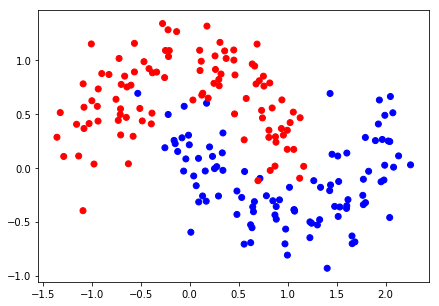

In [39]:
import numpy as np
import matplotlib.pyplot as plt

X, Y = generate_data('moons')
nx,m = X.T.shape

color= ['blue' if y == 1 else 'red' for y in np.squeeze(Y)]

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], color=color)

plt.show()

X = X.T

<hr>
### - Apliquemos descenso del gradiente a cada regresor logístico por separado

('costo -- iteracion ', 0, ': ', 1.0312641476678102)
('costo -- iteracion ', 1000, ': ', 0.011387866603036093)
('costo -- iteracion ', 2000, ': ', 0.00354838240400027)
('costo -- iteracion ', 3000, ': ', 0.002016164257344771)
('costo -- iteracion ', 4000, ': ', 0.001389048934086228)
('costo -- iteracion ', 5000, ': ', 0.0010525881019865697)
('costo -- iteracion ', 6000, ': ', 0.0008441618955644315)
('costo -- iteracion ', 7000, ': ', 0.0007029408409882717)
('costo -- iteracion ', 8000, ': ', 0.0006012010222325543)
('costo -- iteracion ', 9000, ': ', 0.0005245570899176142)
('costo -- iteracion ', 10000, ': ', 0.00046482347015511135)
('costo -- iteracion ', 11000, ': ', 0.00041700871637752627)
('costo -- iteracion ', 12000, ': ', 0.0003779005298891054)
('costo -- iteracion ', 13000, ': ', 0.000345340270429352)
('costo -- iteracion ', 14000, ': ', 0.00031782498425352924)
('costo -- iteracion ', 15000, ': ', 0.00029427677279403926)
('costo -- iteracion ', 16000, ': ', 0.0002739029084052073

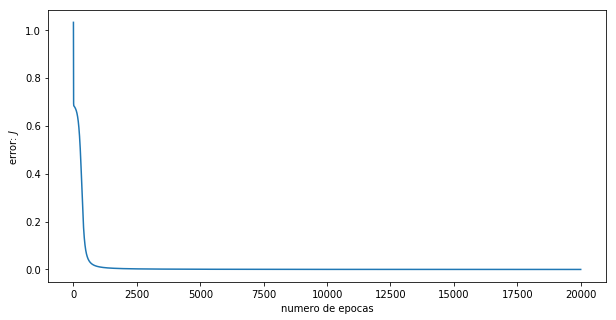

In [40]:
'''
Metaparameters initialization
'''
num_epochs = 20000
learning_rate = 0.1

'''
Dataset loading
'''
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0, 1, 1, 0]])
X = X.T

'''
Parameters initialization
'''
layers = {'l0':(2, 'sigmoid'), 'l1':(5, 'sigmoid'), 'l2':(5, 'sigmoid'), 'l3':(1, 'sigmoid')} #dictionary with layers parameters
parameters = init(layers)

l = len(layers)

error_array = np.zeros([num_epochs])#lo utilizaremos para plotear el error

'''
Gradient descent
'''
for i in range(num_epochs): #2000 iteraciones del descenso del gradiente
    '''
    Forward Propagation
    '''
    forward_computation = feed_forward(X, parameters)
        
    '''
    Backward Propagation
    '''
    backward_computation = backward_propagation(parameters, forward_computation, Y)
    
    '''
    Parameters Update
    '''
    parameters = update_params(parameters, backward_computation, learning_rate)
    
    '''
    Cost estimation
    '''
    J = cost(loss(Y, forward_computation['l'+str(l-1)]['A']))
    error_array[i] = J
    
    
    if(i%1000 == 0):
        print("costo -- iteracion ", i, ": ", J)
        
print("parametros actualizados: ", parameters)

'''
Visualizacion del error por epoca
'''
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,num_epochs-1, num_epochs), error_array)
plt.xlabel("numero de epocas")
plt.ylabel("error: "+r'$J$')
plt.show()

### - Visualizacion del resultado

In [41]:
import matplotlib.pyplot as plt

def visualize_lr(parameters, X, Y):
    X = X.T
    
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = predict_multilayer(parameters, np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    
    color= ['blue' if y == 1 else 'red' for y in np.squeeze(Y)]
    plt.scatter(X[:,0], X[:,1], color=color)
    
    plt.show()

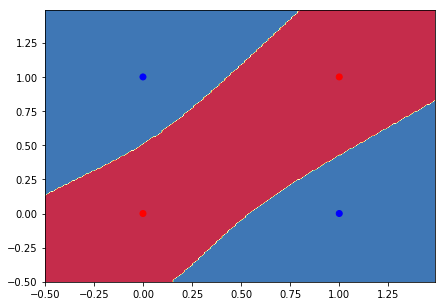

In [42]:
visualize_lr(parameters, X, Y)